# Introduction:

Living in our era, music is becoming a significant
aspect in everybody’s life. Finding an excellent song is
becoming a tedious job . Therefore, our System
recommender and Hit Music predictor comes to make
users life much convenient. Machine learning plays
an important role in our prediction such as content
based algorithm, Random Forest, Extra Tree and
many other Machine learning algorithms.

# Objective:
Can we enhance users experience in finding his/her
type of music in same time? can we predict next hit
music one that is going make a revaluation in music
industry?

# 1) import 

In [1]:
import os
import sys
import glob
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2) Read and clean data 

In [2]:

# function to get the data
def get_songs_df_from_csv(filename):
    return pd.read_csv(filename,index_col=0)   

# function to clean data
def clean(df):
    df = df.fillna(0)
    #Drop rows with year = 0
    df = df.drop(df[df.year == 0].index)
    #Drop rows with song hotness = 0
    df = df.drop(df[df.song_hotttnesss==0].index)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep]

# function that drop un wanted coulmns 
def drop_specific_cols(df):
    cols = ['analysis_sample_rate','danceability','genre','energy','artist_7digitalid',
            'audio_md5','analyzer_version','artist_latitude','artist_location','artist_longitude',
            'artist_playmeid','track_7digitalid','release_7digitalid','key_confidence','mode_confidence',
            'time_signature_confidence']
  
    df = df.drop(cols,axis=1)
    idx_cols = 'idx_'
    return df[df.columns.drop(list(df.filter(regex=idx_cols)))]

In [3]:
#GETTING DATA
songs_df = get_songs_df_from_csv('/Users/faisalshuraym/Desktop/Data_Scince_GA/Capstone_sub/Data/msd_summary.csv')

#During the csv making process, I was merging different dfs into one df and df index info was lost. Let's reset the indices
songs_df.reset_index(drop=True,inplace=True)

In [4]:
# function calls 
df = clean(songs_df)
df = drop_specific_cols(df)

In [5]:
# Read song data another song data 
dff =pd.read_csv('/Users/faisalshuraym/Desktop/Data_Scince_GA/Capstone_sub/Data/song_data.csv')

In [6]:
# Test Data to in order to check whether song is hit or not   
billboard = pd.read_csv("/Users/faisalshuraym/Desktop/Data_Scince_GA/Capstone_sub/Data/HotSongsBillBoard.csv")

In [7]:
# display head 
billboard.head()

,artist,publish_date,track
0,Ricky Nelson,1958-08-09,Poor Little Fool
1,Domenico Modugno,1958-08-09,Nel Blu Dipinto Di Blu (Volaré)
2,Perez Prado And His Orchestra,1958-08-09,Patricia
3,Bobby Darin,1958-08-09,Splish Splash
4,Kalin Twins,1958-08-09,When


In [8]:
# Display coulmns 
df.columns

Index(['duration', 'end_of_fade_in', 'key', 'loudness', 'mode',
       'start_of_fade_out', 'tempo', 'time_signature', 'track_id',
       'artist_familiarity', 'artist_hotttnesss', 'artist_id', 'artist_mbid',
       'artist_name', 'release', 'song_hotttnesss', 'song_id', 'title',
       'year'],
      dtype='object')

In [9]:
# drop unnecessary columns 
df.drop(columns=['track_id','artist_id','artist_mbid','song_id'],inplace=True)

In [10]:
# drop duplicates
df.drop_duplicates('title',keep='first',inplace=True)

In [11]:
# checking shape of data 
df.shape

(241936, 15)

In [12]:
# get an insight about data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241936 entries, 0 to 999999
Data columns (total 15 columns):
duration              241936 non-null float64
end_of_fade_in        241936 non-null float64
key                   241936 non-null int64
loudness              241936 non-null float64
mode                  241936 non-null int64
start_of_fade_out     241936 non-null float64
tempo                 241936 non-null float64
time_signature        241936 non-null int64
artist_familiarity    241936 non-null float64
artist_hotttnesss     241936 non-null float64
artist_name           241936 non-null object
release               241936 non-null object
song_hotttnesss       241936 non-null float64
title                 241936 non-null object
year                  241936 non-null int64
dtypes: float64(8), int64(4), object(3)
memory usage: 29.5+ MB


In [13]:
# checking null values 
df.isnull().sum()

duration              0
end_of_fade_in        0
key                   0
loudness              0
mode                  0
start_of_fade_out     0
tempo                 0
time_signature        0
artist_familiarity    0
artist_hotttnesss     0
artist_name           0
release               0
song_hotttnesss       0
title                 0
year                  0
dtype: int64

In [14]:
# function that gives 1 if a song is a hit or 0 if it is not 
bb_tracks = list(billboard.track)

def find_target(row):
    lst = bb_tracks
    if row['title'] in lst:
        return 1
    else:
        return 0

In [15]:
# declaring a new columns and applying function above 
df['bbhot'] = df.apply(find_target, axis=1)

In [16]:
# see the value of 'bbhot' which is 
df['bbhot'].value_counts()

0    231662
1     10274
Name: bbhot, dtype: int64

In [17]:
# Displaying head
df.head(10)

,duration,end_of_fade_in,key,loudness,mode,start_of_fade_out,tempo,time_signature,artist_familiarity,artist_hotttnesss,artist_name,release,song_hotttnesss,title,year,bbhot
0,252.05506,2.049,10,-4.829,0,236.635,87.002,4,0.649822,0.394032,Faster Pussy cat,Monster Ballads X-Mas,0.542899,Silent Night,2003,1
1,156.55138,0.258,9,-10.555,1,148.660,150.778,1,0.439604,0.356992,Karkkiautomaatti,Karkuteillä,0.299877,Tanssi vaan,1995,0
2,138.97098,0.000,7,-2.060,1,138.971,177.768,4,0.643681,0.437504,Hudson Mohawke,Butter,0.617871,No One Could Ever,2006,0
13,318.45832,0.502,10,-10.670,1,306.265,67.567,3,0.621826,0.406985,Tiger Lou,The Loyal,0.463490,Pilots,2005,0
15,262.26893,0.194,11,-3.925,1,259.419,122.332,4,0.529819,0.410229,Lena Philipsson,Lena 20 År,0.212045,006,1998,0
16,216.47628,2.032,6,-14.379,1,208.062,99.214,4,0.685503,0.446733,Shawn Colvin,Cover Girl,0.270776,(Looking For) The Heart Of Saturday,1994,0
17,196.02240,0.000,8,-6.366,1,185.202,189.346,7,0.734471,0.511976,Dying Fetus,Descend Into Depravity,0.614766,Ethos of Coercion,2009,0
18,217.57342,0.514,3,-4.867,0,214.309,88.423,4,0.738996,0.563367,Emery,I'm Only A Man (Bonus Track Version),0.717319,Rock-N-Rule,2007,0
27,210.93832,0.247,1,-7.664,1,210.938,207.903,4,0.729867,0.417882,Skinlab,Nerve Damage,0.224820,Take As Needed,2002,0
33,372.42730,0.000,7,-6.663,1,355.062,191.665,3,0.740252,0.472691,Kreator,Violent revolution,0.788727,All of the same blood,2001,0


In [18]:
# saving to csv to applying futher models 
df.to_csv("df-BillBoard.csv", encoding="utf-8", index = False)

# 3) Visualisation 

Text(0.5, 1.0, 'Train data')

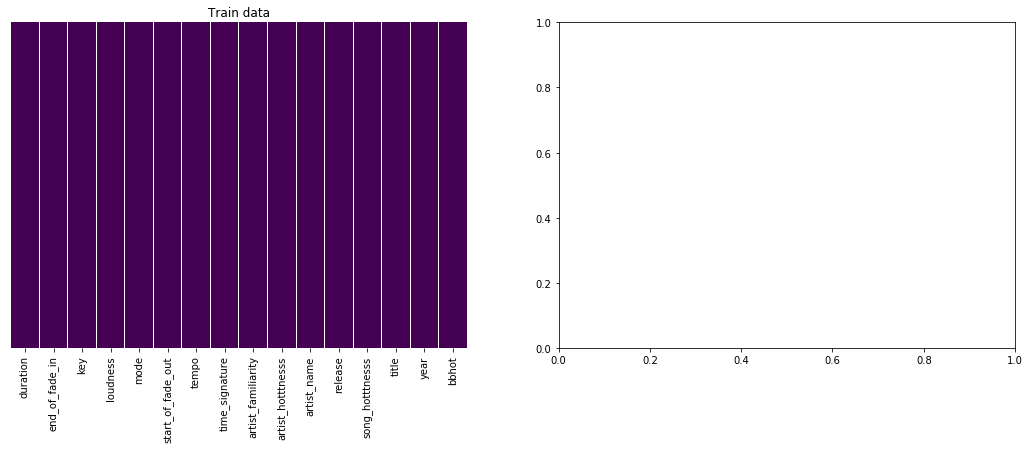

In [33]:
# Visualis nulls witch we don't have 
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

sns.heatmap(df.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

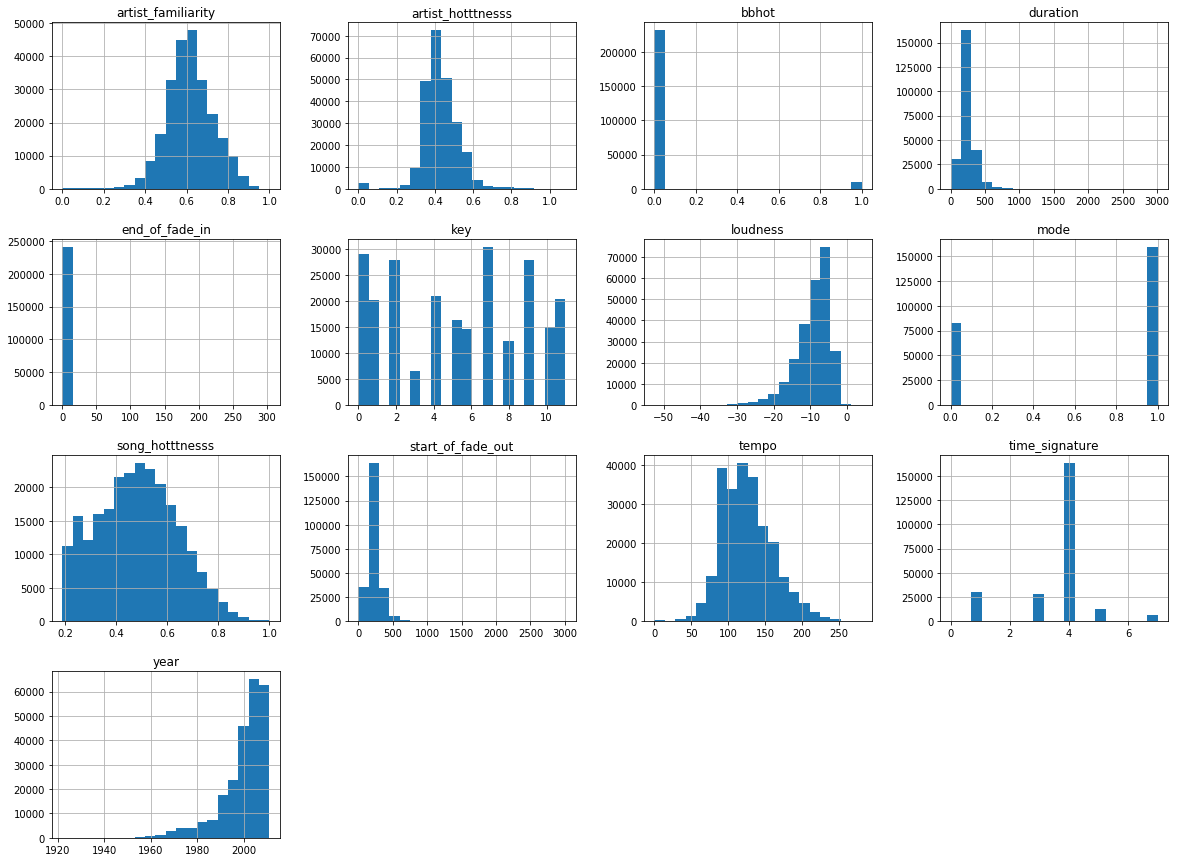

In [20]:
# have an insight about data distribution 
df.hist(bins=20,figsize=(20,15))
plt.show()

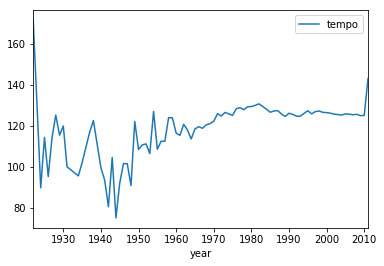

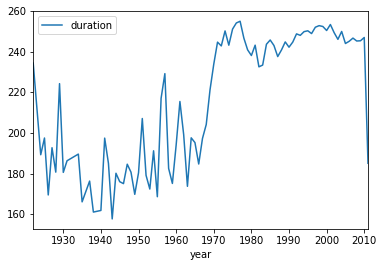

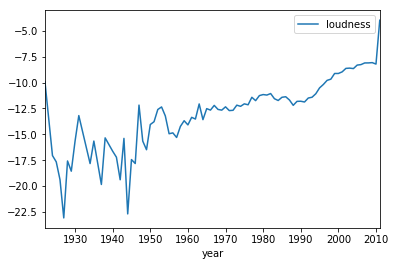

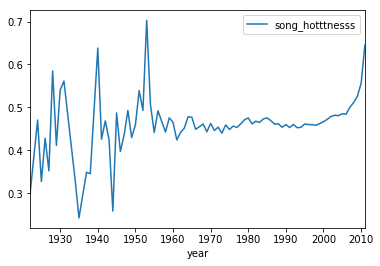

In [21]:
# polting year with other fetures 
agg_df = df.groupby(df.year).mean().reset_index()


agg_df.plot(x='year',y='tempo')

agg_df.plot(x='year',y='duration')

agg_df.plot(x='year',y='loudness')

agg_df.plot(x='year',y='song_hotttnesss')


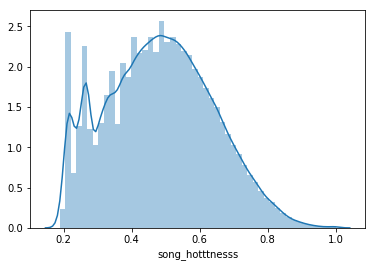

In [22]:
# polting 'song hotnes'wich reader can think of like how popular song is 
sns.distplot(df["song_hotttnesss"])

In [23]:
# getting the top 50 artist in terms of number of song 
top50 = df.artist_name.value_counts().head(50)
top50

Squarepusher                         101
Autechre                              99
Of Montreal                           96
Deerhoof                              88
My Dying Bride                        86
Alan Silvestri                        86
Daniel Johnston                       85
Sepultura                             84
Less Than Jake                        83
NOFX                                  83
Bersuit Vergarabat                    82
Obituary                              81
Joni Mitchell                         80
Sparks                                80
Alice Cooper                          79
Enya                                  79
Graham Coxon                          78
Irwin Goodman                         78
GWAR                                  77
Tankard                               76
Casiotone For The Painfully Alone     76
Bad Religion                          75
Sebadoh                               74
Vangelis                              74
Deftones        

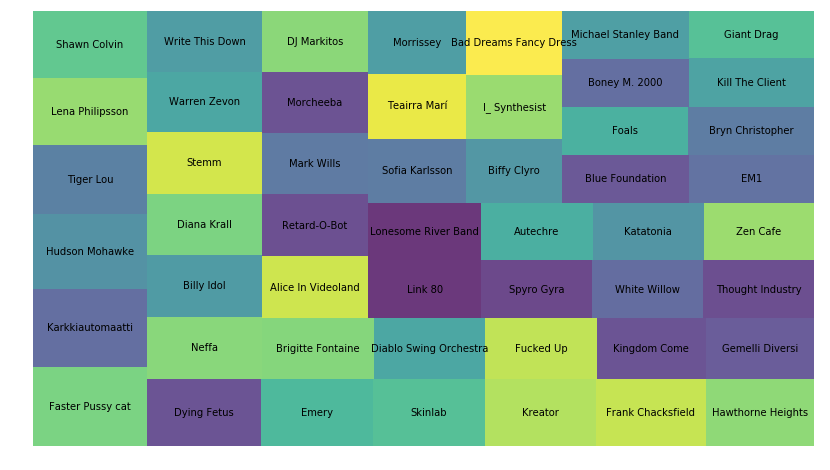

In [24]:
# ploting artist based on how many song they have done some of them have more sonf than others
import squarify 
plt.figure(figsize=(14,8))
squarify.plot(sizes=top50, label=df["artist_name"], alpha=.8 )
plt.axis('off')
plt.show()

In [25]:
#Calculating the number of songs by each of the artists
print(df.groupby('artist_name').size())
popular_artist=df.groupby('artist_name').size()
print('popular_artist',popular_artist)
artist_list=df['artist_name'].values.tolist()

artist_name
!Dela Dap                                                                 1
!Deladap                                                                  3
#Poundsign#                                                               1
$tinkworx                                                                 7
& And Oceans                                                              9
'68 Comeback                                                              1
'N Sync/Phil Collins                                                      1
'Til Tuesday                                                             18
't Hof Van Commerce                                                      32
't Hof Van Commerce & Brahim                                              1
(Love) Tattoo                                                             1
(hed) p.e.                                                                1
*Shels                                                                   15


Text(0.5, 1.0, 'title')

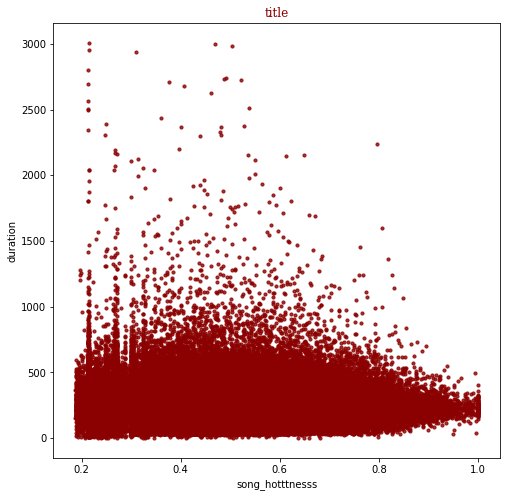

In [26]:
# Graphing 'song_hotttnesss' which is song popularity and we can understand successful song are not long 
fig = plt.figure(figsize=(8, 8))
sns.regplot(x='song_hotttnesss',
            y='duration', data=df, fit_reg=False,scatter_kws={'s':10}, color='darkred')

plt.title('title', fontdict= {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        })


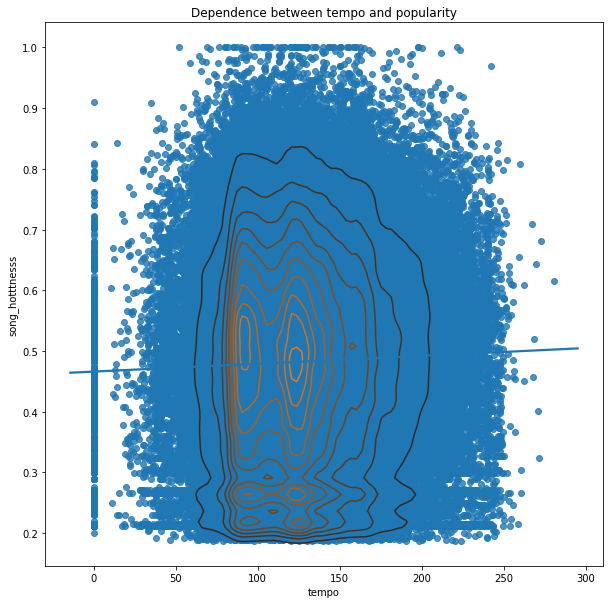

In [28]:
# ploting tempo and song hotttnesss to see the relation between tempo and poplurity of a song
fig=plt.subplots(figsize=(10,10))
plt.title('Dependence between tempo and popularity')
sns.regplot(x='tempo', y='song_hotttnesss',
            ci=None, data=df)
sns.kdeplot(df.tempo,df.song_hotttnesss)